# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [34]:
city_info = []
processing_record_count = 1
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    
    try: 
        weather_check = requests.get(query_url + city).json()
        lat = weather_check["coord"]["lat"]
        Lng = weather_check["coord"]["lon"]
        temp = weather_check["main"]["temp_max"]
        hum = weather_check["main"]["humidity"]
        cloudy = weather_check["clouds"]["all"]
        wind = weather_check["wind"]["speed"]
        country = weather_check["sys"]["country"]
        date = weather_check["dt"]
    
        city_info.append({"City": city, 
                          "Lat": lat, 
                          "Lng": Lng, 
                          "Max Temp": temp,
                          "Humidity": hum,
                          "Cloudiness": cloudy,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
        print(f"Processing Record {processing_record_count} | {city}")
    
        processing_record_count += 1
    
    except:
        print("City not found. Skipping...") 
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 | khatanga
Processing Record 2 | hilo
City not found. Skipping...
Processing Record 3 | kodiak
Processing Record 4 | leningradskiy
Processing Record 5 | torbay
Processing Record 6 | faanui
Processing Record 7 | vandra
Processing Record 8 | kapaa
Processing Record 9 | geraldton
Processing Record 10 | moerai
Processing Record 11 | port alfred
Processing Record 12 | rikitea
Processing Record 13 | jacareacanga
Processing Record 14 | bredasdorp
Processing Record 15 | beyneu
Processing Record 16 | yellowknife
Processing Record 17 | tazovskiy
Processing Record 18 | ushuaia
Processing Record 19 | ahipara
Processing Record 20 | pokhara
Processing Record 21 | hay river
Processing Record 22 | arlit
Processing Record 23 | codrington
Processing Record 24 | qaanaaq
Processing Record 25 | cidreira
Processing Record 26 | east london
Processing Record 27 | mar del plata
Processing Record 28 | ivanteyevka
City not found. Ski

Processing Record 234 | zonguldak
Processing Record 235 | brownsville
Processing Record 236 | luderitz
Processing Record 237 | balkhash
Processing Record 238 | palencia
Processing Record 239 | bonavista
Processing Record 240 | plettenberg bay
Processing Record 241 | meshchovsk
Processing Record 242 | axim
Processing Record 243 | aykhal
Processing Record 244 | mopipi
Processing Record 245 | kavieng
Processing Record 246 | dikson
Processing Record 247 | riachao das neves
Processing Record 248 | malakal
Processing Record 249 | sisimiut
Processing Record 250 | aqtobe
Processing Record 251 | do gonbadan
City not found. Skipping...
Processing Record 252 | celestun
Processing Record 253 | kedainiai
City not found. Skipping...
Processing Record 254 | buchanan
City not found. Skipping...
Processing Record 255 | manjeshwar
Processing Record 256 | canutama
Processing Record 257 | charters towers
Processing Record 258 | saint george
Processing Record 259 | ville-marie
Processing Record 260 | clerv

Processing Record 464 | ambalavao
City not found. Skipping...
Processing Record 465 | madison
Processing Record 466 | camana
Processing Record 467 | camacha
Processing Record 468 | deputatskiy
Processing Record 469 | san quintin
Processing Record 470 | oum hadjer
City not found. Skipping...
Processing Record 471 | shelton
Processing Record 472 | maragogi
Processing Record 473 | karratha
City not found. Skipping...
Processing Record 474 | petrovskoye
Processing Record 475 | salinopolis
Processing Record 476 | tual
Processing Record 477 | viedma
Processing Record 478 | pucara
Processing Record 479 | chiang rai
Processing Record 480 | rio grande city
Processing Record 481 | itupiranga
Processing Record 482 | phitsanulok
Processing Record 483 | boa vista
Processing Record 484 | gorontalo
Processing Record 485 | prince rupert
Processing Record 486 | husavik
Processing Record 487 | yokadouma
Processing Record 488 | sorong
City not found. Skipping...
Processing Record 489 | iberia
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
city_info_df = pd.DataFrame(city_info)
city_info_df.to_csv("../output_data/cities.csv")

In [36]:

city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,56.70,69,48,16.35,RU,1627160941
1,hilo,19.7297,-155.0900,91.27,77,90,6.91,US,1627160930
2,kodiak,57.7900,-152.4072,58.51,82,75,8.05,US,1627160943
3,leningradskiy,69.3833,178.4167,37.54,94,100,5.26,RU,1627160943
4,torbay,47.6666,-52.7314,67.75,77,50,11.27,CA,1627160943


In [37]:
city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,22.121621,11.416883,70.287270,68.400000,51.634783,7.971113,1.627161e+09
std,32.560928,89.099309,15.201891,22.288182,40.184793,5.513901,8.582197e+01
min,-54.800000,-175.200000,35.440000,8.000000,0.000000,0.000000,1.627161e+09
25%,-3.733550,-68.179550,58.325000,56.000000,6.000000,3.670000,1.627161e+09
50%,27.916700,16.150000,72.320000,74.000000,55.000000,6.850000,1.627161e+09
75%,48.493650,80.987850,81.670000,86.000000,95.000000,11.230000,1.627161e+09
max,78.218600,179.316700,105.510000,100.000000,100.000000,32.080000,1.627161e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

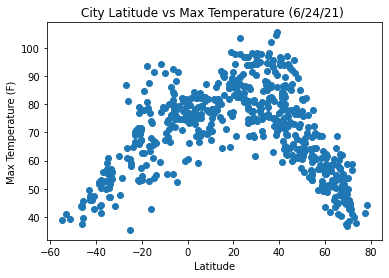

In [38]:
plt.scatter(city_info_df["Lat"],city_info_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (6/24/21) ")
plt.show()

In [ ]:
#

## Latitude vs. Humidity Plot

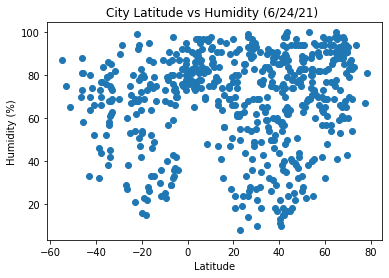

In [39]:
plt.scatter(city_info_df["Lat"],city_info_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (6/24/21) ")
plt.show()

## Latitude vs. Cloudiness Plot

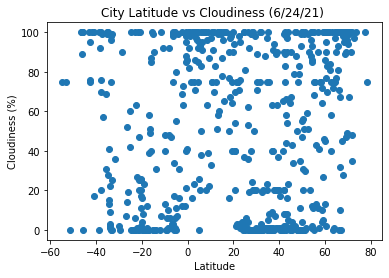

In [40]:
plt.scatter(city_info_df["Lat"],city_info_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (6/24/21) ")
plt.show()

## Latitude vs. Wind Speed Plot

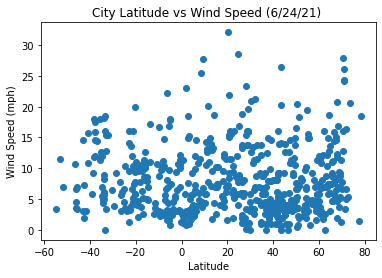

In [41]:
plt.scatter(city_info_df["Lat"],city_info_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (6/24/21) ")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
northern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] >= 0]
southern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] <= 0]

The r-value is: -0.6501691163266115


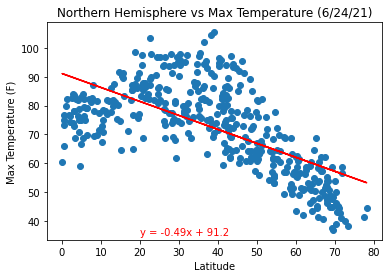

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7755117969360276


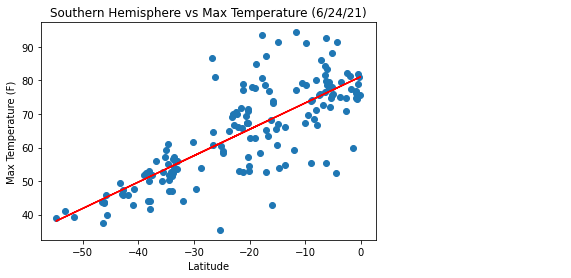

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011281700018920189


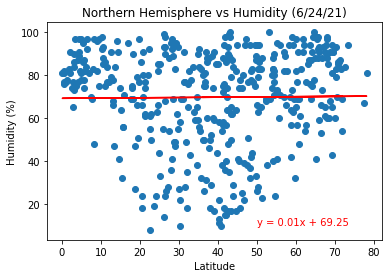

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere vs Humidity (6/24/21)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006169309916024941


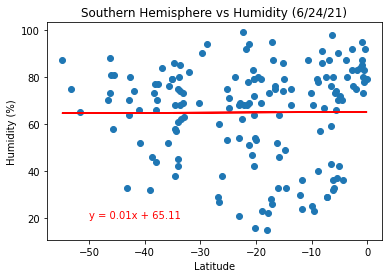

In [84]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere vs Humidity (6/24/21)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.025940890045002073


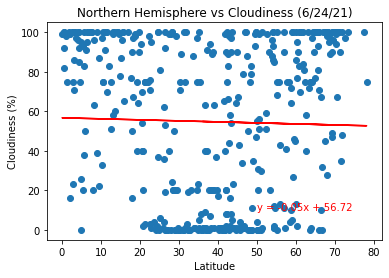

In [85]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.14343996280647295


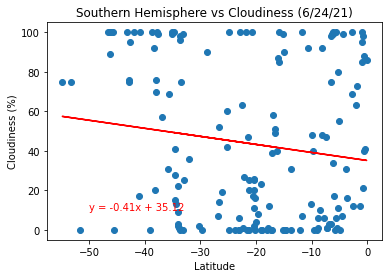

In [89]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02846841970525132


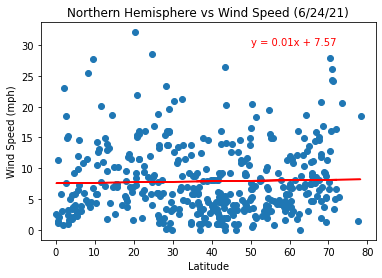

In [91]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,30), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere vs Wind Speed (6/24/21)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.149512287128021


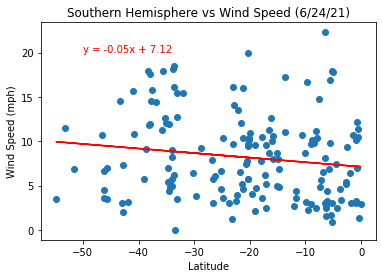

In [94]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere vs Wind Speed (6/24/21)")
plt.show()